In [23]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os

In [24]:
# Step 2: Load the Data
data = pd.read_csv('dataset.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [25]:
# Step 3: Select Important Features
selected_features = [
    'Age at enrollment', 'Previous qualification', 'Curricular units 1st sem (approved)',
    'Scholarship holder', 'Debtor', 'Gender', 'Course'
]

X = data[selected_features]
y = data['Target']

In [26]:
# Step 4: Clean the 'Target' Column
y = y.astype(str).str.strip()
y.fillna(y.mode()[0], inplace=True)
y = y.replace({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})

C:\Users\thinkBIG\AppData\Local\Temp\ipykernel_2620\1990297251.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})


In [27]:
# Step 5: Split Data into Training, Validation, and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [28]:
# Step 6: Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Step 7: Train Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Random Forest Accuracy: 70.78%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       210
           1       0.76      0.88      0.82       332
           2       0.41      0.24      0.30       122

    accuracy                           0.71       664
   macro avg       0.63      0.61      0.61       664
weighted avg       0.68      0.71      0.69       664


Confusion Matrix:


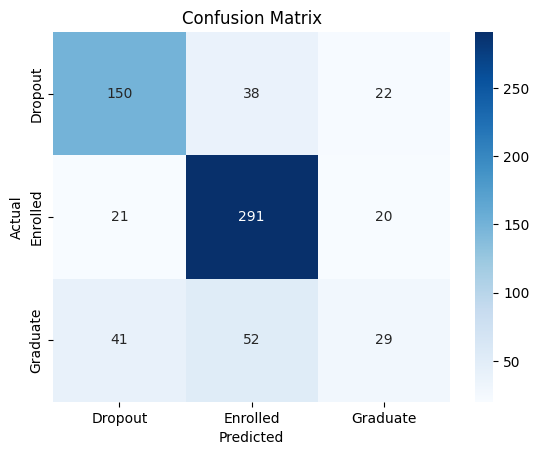

In [30]:
# Step 8: Evaluate the Model
y_pred_rf = random_forest_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [31]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go one level up
model_dir = os.path.join(parent_dir, "models")
os.makedirs(model_dir, exist_ok=True)

# Save model
model_path = os.path.join(model_dir, "random_forest_model.pkl")
joblib.dump(random_forest_model, model_path)
print(f"Random Forest model saved successfully at {model_path}!")

# Save scaler
scaler_path = os.path.join(model_dir, "scaler.pkl")
joblib.dump(scaler, scaler_path)
print(f"Scaler saved successfully at {scaler_path}!")


Random Forest model saved successfully at c:\Users\thinkBIG\Desktop\Student-Retention\models\random_forest_model.pkl!
Scaler saved successfully at c:\Users\thinkBIG\Desktop\Student-Retention\models\scaler.pkl!
